In [33]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio
import scipy.fftpack
import scipy.signal
import scipy.io.wavfile
import copy
import wave 
from IPython.display import Audio

In [34]:
file = 'XC403881.wav'
fs,bc = scipy.io.wavfile.read(file)

In [35]:
fs

44100

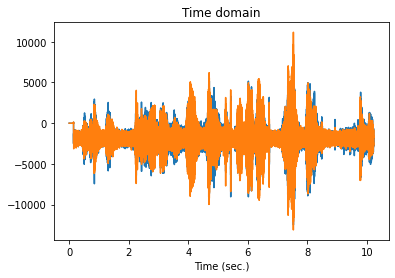

In [36]:
# create a time vector based on the data sampling rate
n = len(bc)
timevec = np.arange(0,n)/fs

# plot the data from the two channels
plt.plot(timevec,bc)
plt.xlabel('Time (sec.)')
plt.title('Time domain')
plt.show()

In [37]:
# compute the power spectrum
hz = np.linspace(0,fs/2,int(np.floor(n/2)+1))
bcpow = np.abs(scipy.fftpack.fft( scipy.signal.detrend(bc[:,0]) )/n)**2

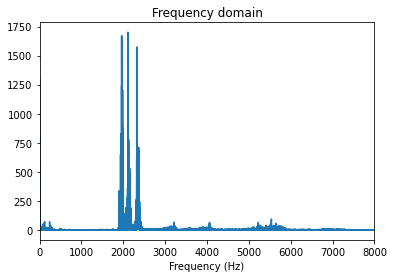

In [38]:
plt.plot(hz,bcpow[0:len(hz)])
plt.xlabel('Frequency (Hz)')
plt.title('Frequency domain')
plt.xlim([0,8000])
plt.show()

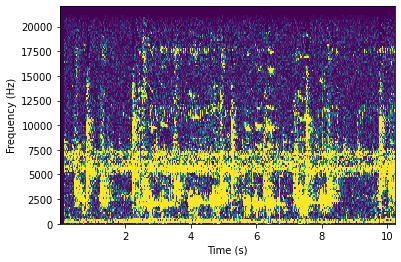

In [39]:
## time-frequency analysis via spectrogram

frex,time,pwr = scipy.signal.spectrogram(bc[:,0],fs)

plt.pcolormesh(time,frex,pwr,vmin=0,vmax=9)
plt.xlabel('Time (s)'), plt.ylabel('Frequency (Hz)')
plt.show()

In [40]:
a = Audio(file)
a